# Scores Prediction Using Linear Regression
In this project, I have created a CSV file with two variables: Student Hours studied and Scores. The goal here is to make a prediction using linear regression to determine the marks a student will score based on the number of hours they studied.

**Author: Hamidou Maiga**

In [3]:
# Loading the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving Students_Hours_Scores.csv to Students_Hours_Scores.csv


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Students_Hours_Scores.csv')
print(df.shape)
print(df.columns)
print(df)

(25, 2)
Index(['Hours', 'Scores'], dtype='object')
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Data Visualization
Here, I'm going to visualize the data looks using Matplotlib,  a two-dimensional python plotting library.

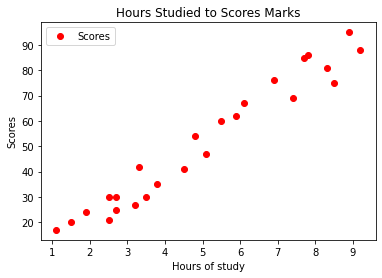

In [8]:
# Plotting the data
df.plot(x="Hours",y="Scores",c="r",style="o")
plt.title("Hours Studied to Scores Marks")
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.show()

# Data Analysis Using Linear Regression
Here, I will designate the variables x as hours studied and the variable y as scores.

In [10]:
# Data Partition into training 80% and test 20% sets
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

print("X Shape:",X.shape)
print("Y Shape:",Y.shape)
print("X_test Shape:",X_test.shape)
print("Y_test Shape:",Y_test.shape)

X Shape: (25, 1)
Y Shape: (25,)
X_test Shape: (5, 1)
Y_test Shape: (5,)


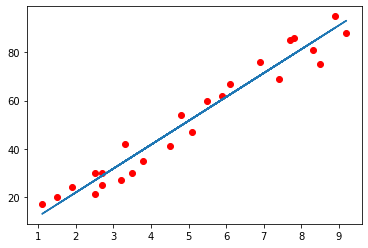

In [11]:
# Training the Model & Plotting the predicted linear regression line
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

# Linear Regression Line
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y,c="r",marker="o")
plt.plot(X,line)
plt.show()

# Predictions: 

Testing Data: X_test [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
   ActualScores  PredictedScores
0            20        16.884145
1            27        33.732261
2            69        75.357018
3            30        26.794801
4            62        60.491033


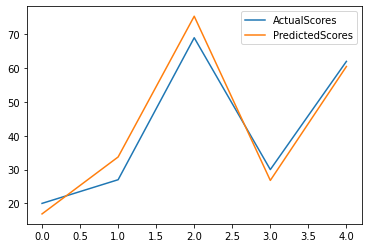

In [17]:
# Predicting Scores for Testing Data
Y_pred=regressor.predict(X_test)
print("Testing Data: X_test", X_test)

#Comparing Predicted Scores to Actual Values
df_predict = pd.DataFrame({"ActualScores":Y_test,"PredictedScores":Y_pred})
print(df_predict)

# Plotting a Line Chart to Compare Actual Sores to Predicted Scores
df_predict.ActualScores.plot()
df_predict.PredictedScores.plot()
plt.legend()

# Calculationg the Accuracy Score for our preditions
The Accuracy Score is a useful metric for evaluating the fraction of predictions the model got right. 

In [18]:
from sklearn import metrics  
print("Training score : ",regressor.score(X_train,Y_train))
print("Test set score : " ,regressor.score(X_test,Y_test))


print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred))

Training score :  0.9515510725211553
Test set score :  0.9454906892105354
Mean Absolute Error: 4.183859899002982


# Insights on Academic Performance
Here, I will use the model to determine the score of a student that has studied for 9 Hours.

In [21]:
# Prediction for of score for 9 hours of study
print("Score of student who studied for 9 hours a day : ", regressor.predict([[9]]))

Score of student who studied for 9 hours a day :  [91.21406837]
Score of student who studied for 9 hours a day :  [51.57144244]


In [ ]:
# Prediction for of score for any hours of study
X_input=float(input("ENTER HOURS HERE: "))
print('Predicted Score{}'.format(regressor.predict([[X_input]])))

# CONCLUSION
From this model, I have come to the conclusion that the more time a student spent studying for a test, the higher the chances for that student to achieve a high test score. However, EXTENDED STUDY SESSIONS  may also have a negative impact on the student and the score. The student only needs a maximum of 11 hours a day to be able to achieve the highest score possible 100/100.  Anything beyond that is impairing and depriving the student, thus ineffective and inefficient to achieve a maximum score. 